<a href="https://colab.research.google.com/github/odartsi/DataVisualisation/blob/master/Investigationofcorrelationsissues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigation of correlation between exogeneous parameters (bid and budget) and target values (revenues and ad_spend)

Content: 
We realised that the neural network model gives very bad constant predictions for revenues, no matter the changes in the budget. This is due to the fact that there is very little correlation between revenues and daily budget (around 30%). To see how we can improve this correlation, we will test different groups of training data.



1.   Train data per channel (fb, google, applovin)
2.   Train data per budget threshold 
3.   Train data per client 




In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
#upload all data
uploaded = files.upload()

Saving train_ids_model4.csv to train_ids_model4.csv
Saving train_ids_model5.csv to train_ids_model5.csv


In [ ]:
df_originally=pd.read_csv('train_ids_model4.csv')
df_originally_cohorted=pd.read_csv('train_ids_model5.csv')

# Correlation matrix of all data we have 


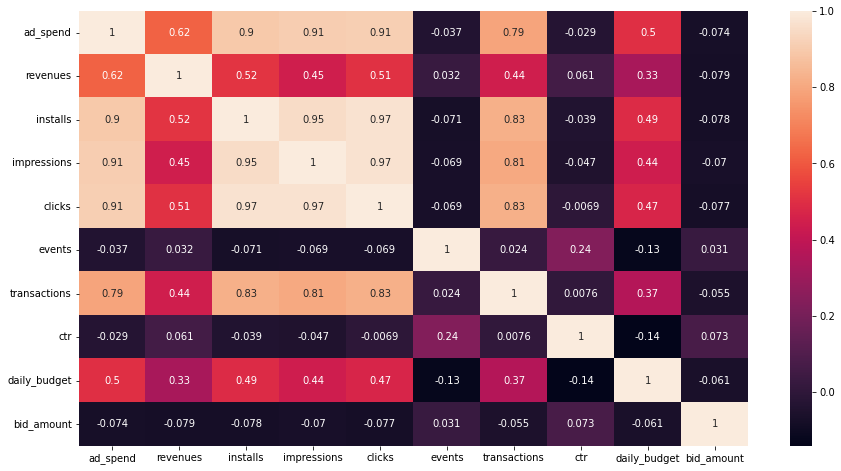

In [ ]:
df_new=df_originally[['ad_spend', 'revenues', 'installs', 'impressions','clicks', 'events', 'transactions', 'ctr','daily_budget','bid_amount']].copy()
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(), annot = True);

# Correlation matrix of all cohorted data

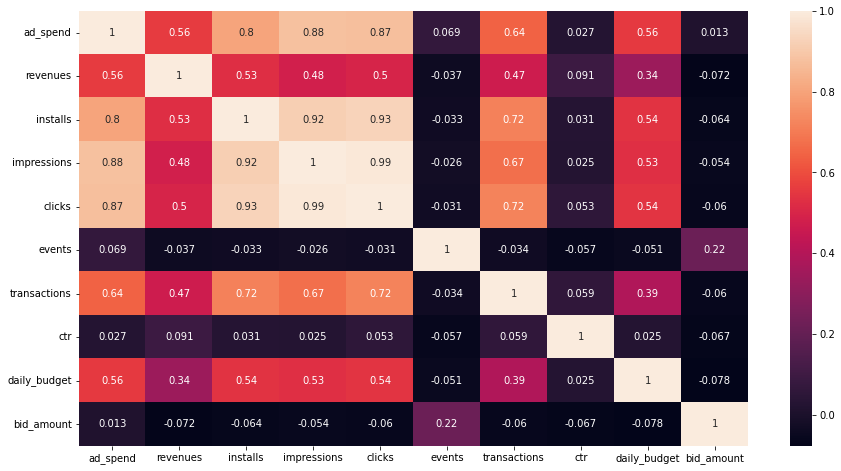

In [ ]:
df_new=df_originally_cohorted[['ad_spend', 'revenues', 'installs', 'impressions','clicks', 'events', 'transactions', 'ctr','daily_budget','bid_amount']].copy()
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(), annot = True);

# 1. Correlation matrix per channel

## Google

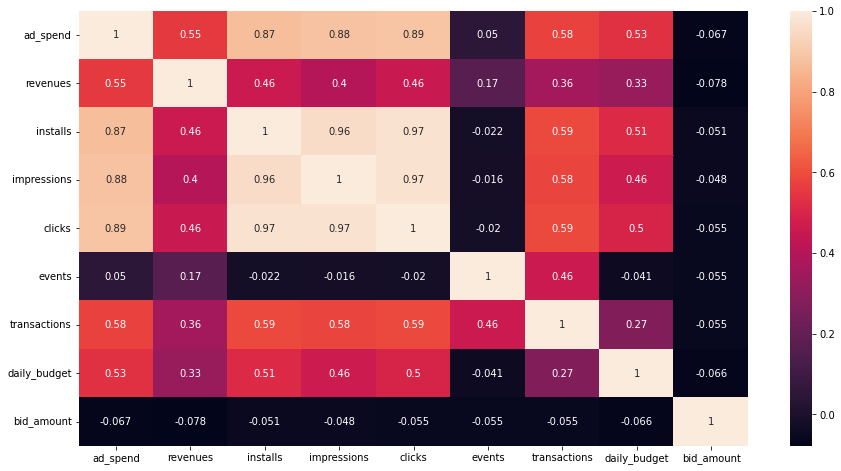

In [ ]:
df_google = pd.read_csv("df_google.csv")
df_new_g=df_google[['ad_spend', 'revenues', 'installs', 'impressions','clicks', 'events', 'transactions','daily_budget','bid_amount']].copy()
plt.figure(figsize=(15,8))
sns.heatmap(df_new_g.corr(), annot = True);

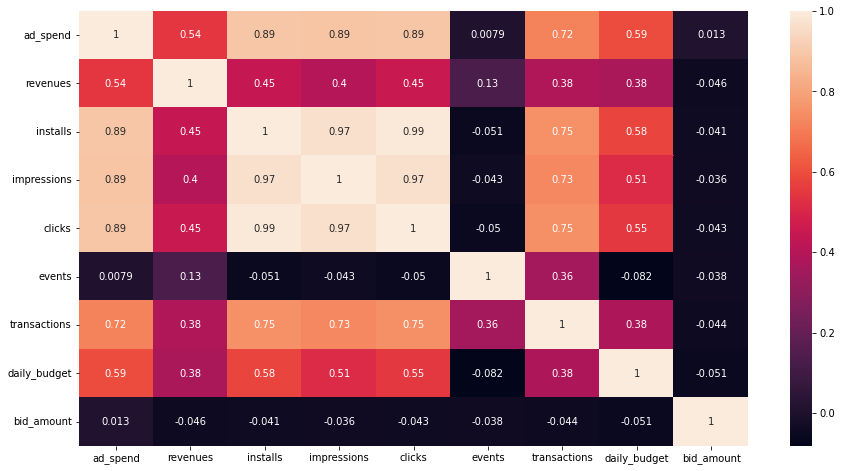

In [ ]:
df_new_g =df_new_g[(df_new_g.revenues>0) & (df_new_g.daily_budget >0) & (df_new_g.ad_spend >0)]
plt.figure(figsize=(15,8))
sns.heatmap(df_new_g.corr(), annot = True);

In [ ]:
df_new_g

,ad_spend,revenues,installs,impressions,clicks,events,transactions,daily_budget,bid_amount
1,8.637531,0.065593,5,208,9,68,4,117.438037,0.000000
2,11.143052,0.017420,4,202,24,23,1,118.407968,0.000000
5,12.969299,9.591595,7,375,23,34,1,118.193701,0.000000
152,116.889384,0.990000,65,9416,274,351,1,100.359991,0.000000
165,119.517060,5.970000,77,9636,357,468,3,120.545172,0.000000
...,...,...,...,...,...,...,...,...,...
21832,19.155736,0.792800,22,11873,638,242,242,18.506421,0.300000
21833,18.912643,0.212800,43,14723,837,523,523,18.635165,0.150000
21834,11.197504,2.448100,37,11148,623,419,419,18.385624,0.300000
21842,1.337039,0.445200,14,1181,77,247,248,18.188984,0.060630


## Facebook

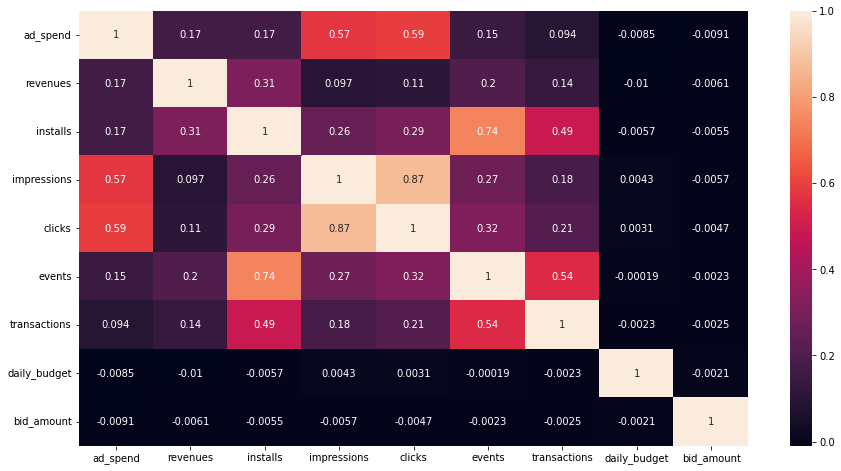

In [ ]:
df_facebook = pd.read_csv("df_facebook.csv")
df_new_fb=df_facebook[['ad_spend', 'revenues', 'installs', 'impressions','clicks', 'events', 'transactions','daily_budget','bid_amount']].copy()
plt.figure(figsize=(15,8))
sns.heatmap(df_new_fb.corr(), annot = True);

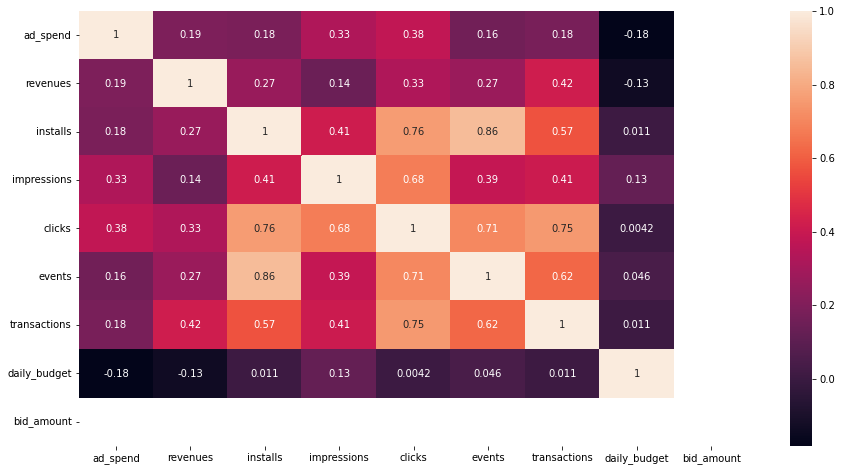

In [ ]:
# cleaning up a bit
df_new_fb =df_new_fb[(df_new_fb.revenues>0) & (df_new_fb.daily_budget >0) & (df_new_fb.ad_spend >0)]
plt.figure(figsize=(15,8))
sns.heatmap(df_new_fb.corr(), annot = True);

In [ ]:
df_new_fb.bid_amount.max()

0.0

## Applovin

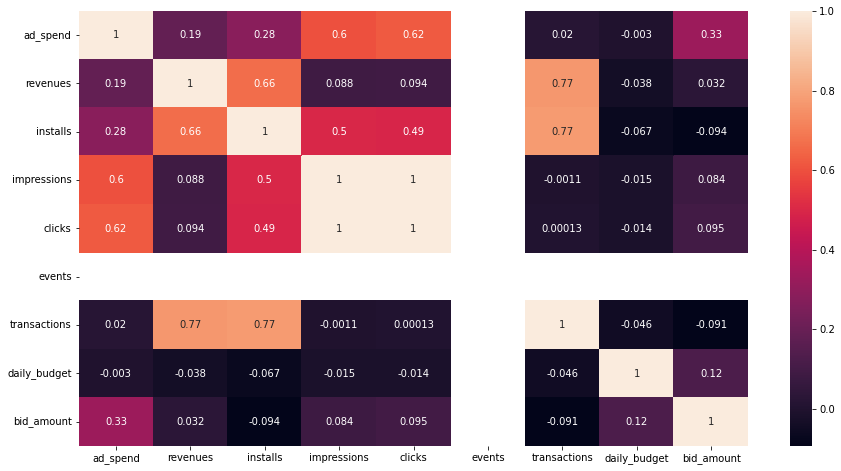

In [ ]:
df_applovin = pd.read_csv("df_applovin.csv")
df_new_a=df_applovin[['ad_spend', 'revenues', 'installs', 'impressions','clicks', 'events', 'transactions','daily_budget','bid_amount']].copy()
plt.figure(figsize=(15,8))
sns.heatmap(df_new_a.corr(), annot = True);

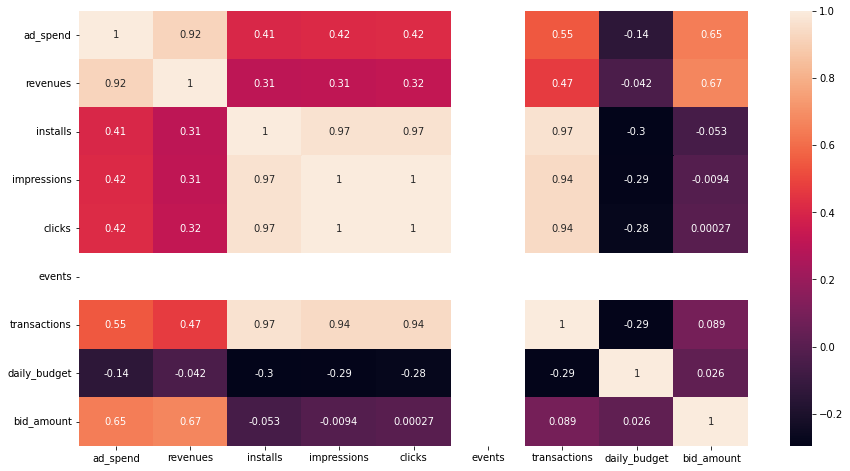

In [ ]:
df_new_a =df_new_a[(df_new_a.revenues>0) & (df_new_a.daily_budget >0) & (df_new_a.ad_spend >0)]
plt.figure(figsize=(15,8))
sns.heatmap(df_new_a.corr(), annot = True);

In [ ]:
df_new_a

,ad_spend,revenues,installs,impressions,clicks,events,transactions,daily_budget,bid_amount
380,0.20,0.022808,1,11,9,0,1,1500.0,0.20
502,0.10,0.016201,1,3,3,0,2,5000.0,0.10
792,37.20,4.082740,62,2922,1829,0,76,1500.0,0.60
793,18.60,3.149870,30,2065,1337,0,53,1500.0,0.60
794,7.80,0.982580,13,1293,804,0,21,1500.0,0.60
...,...,...,...,...,...,...,...,...,...
10916,0.08,0.002845,2,93,60,0,2,1500.0,0.04
10917,0.16,0.011293,4,80,45,0,4,1500.0,0.04
10918,0.04,0.005801,1,57,35,0,2,1500.0,0.04
10921,0.16,0.031993,4,84,56,0,4,1500.0,0.04


In [ ]:
acc=pd.read_csv('accuracy_beforethesplit.csv')

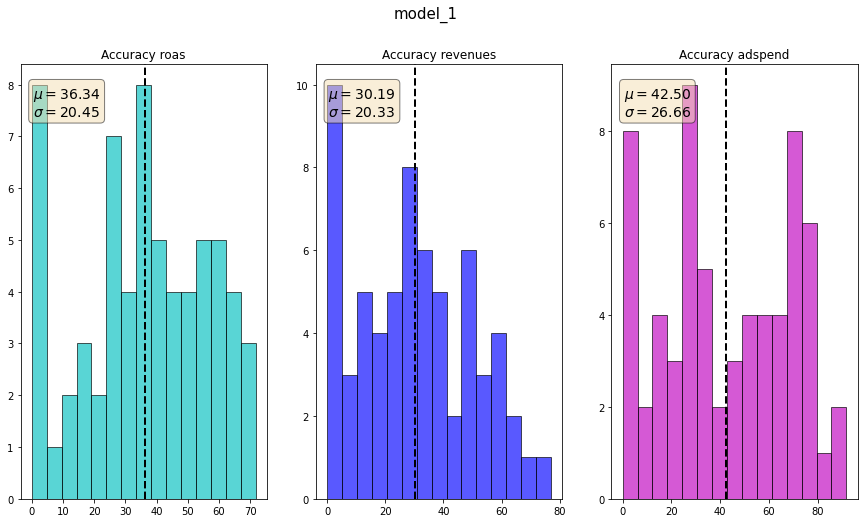

In [ ]:
fig, axs = plt.subplots(1, 3,figsize=(15, 8))
axs[0].hist(acc.acc_roas, bins=15, color='c', edgecolor='k', alpha=0.65)
axs[0].axvline(acc.acc_roas.mean(), color='k', linestyle='dashed', linewidth=2);
axs[0].title.set_text("Accuracy roas");
mean=acc.acc_roas.mean()
std=acc.acc_roas.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mean, ),
    r'$\sigma=%.2f$' % (std, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
axs[0].text(0.05, 0.95, textstr, transform=axs[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

axs[1].hist(acc.acc_revenues, bins=15, color='b', edgecolor='k', alpha=0.65)
axs[1].axvline(acc.acc_revenues.mean(), color='k', linestyle='dashed', linewidth=2);
axs[1].title.set_text("Accuracy revenues");
mean=acc.acc_revenues.mean()
std=acc.acc_revenues.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mean, ),
    r'$\sigma=%.2f$' % (std, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
axs[1].text(0.05, 0.95, textstr, transform=axs[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)



axs[2].hist(acc.acc_ad_spend, bins=15, color='m', edgecolor='k', alpha=0.65)
axs[2].axvline(acc.acc_ad_spend.mean(), color='k', linestyle='dashed', linewidth=2);
axs[2].title.set_text("Accuracy adspend");
mean=acc.acc_ad_spend.mean()
std=acc.acc_ad_spend.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mean, ),
    r'$\sigma=%.2f$' % (std, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
axs[2].text(0.05, 0.95, textstr, transform=axs[2].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.suptitle("model_1", fontsize = 15);

In [ ]:
good_acc=acc[acc.acc_roas >40]

In [ ]:
good_acc.id.values

array([208, 117, 178, 225, 142, 252, 639, 150, 274, 227, 135, 161, 632,
       222, 106, 646, 171, 158, 170, 243,  14, 155, 204, 202, 108, 191,
       255, 189, 213, 130])

In [ ]:
len(acc[acc.acc_roas >=60])*100/len(acc)

13.846153846153847

In [ ]:
acc_g=pd.read_csv('accuracy_withgoogletrain.csv')

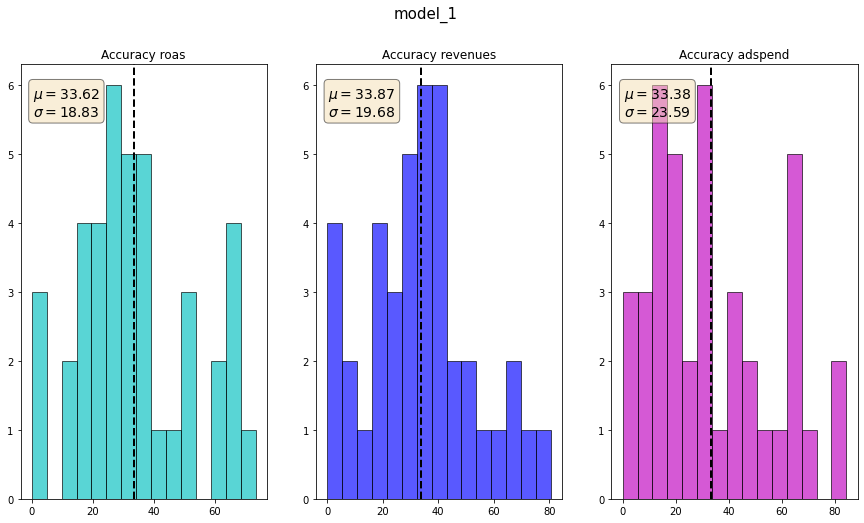

In [ ]:
fig, axs = plt.subplots(1, 3,figsize=(15, 8))
axs[0].hist(acc_g.acc_roas, bins=15, color='c', edgecolor='k', alpha=0.65)
axs[0].axvline(acc_g.acc_roas.mean(), color='k', linestyle='dashed', linewidth=2);
axs[0].title.set_text("Accuracy roas");
mean=acc_g.acc_roas.mean()
std=acc_g.acc_roas.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mean, ),
    r'$\sigma=%.2f$' % (std, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
axs[0].text(0.05, 0.95, textstr, transform=axs[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

axs[1].hist(acc_g.acc_revenues, bins=15, color='b', edgecolor='k', alpha=0.65)
axs[1].axvline(acc_g.acc_revenues.mean(), color='k', linestyle='dashed', linewidth=2);
axs[1].title.set_text("Accuracy revenues");
mean=acc_g.acc_revenues.mean()
std=acc_g.acc_revenues.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mean, ),
    r'$\sigma=%.2f$' % (std, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
axs[1].text(0.05, 0.95, textstr, transform=axs[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)



axs[2].hist(acc_g.acc_ad_spend, bins=15, color='m', edgecolor='k', alpha=0.65)
axs[2].axvline(acc_g.acc_ad_spend.mean(), color='k', linestyle='dashed', linewidth=2);
axs[2].title.set_text("Accuracy adspend");
mean=acc_g.acc_ad_spend.mean()
std=acc_g.acc_ad_spend.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mean, ),
    r'$\sigma=%.2f$' % (std, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
axs[2].text(0.05, 0.95, textstr, transform=axs[2].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.suptitle("model_1", fontsize = 15);

In [ ]:
len(acc_g[acc_g.acc_roas >=60])*100/len(acc_g)

12.195121951219512

In [ ]:
good_acc=acc_g[acc_g.acc_roas >40]
list(good_acc.id)

[117, 525, 158, 639, 646, 122, 632, 225, 171, 274, 191]

# 2. Correlation matrix per client

In [ ]:

acc=pd.read_csv('accuracy_without_applovin.csv')

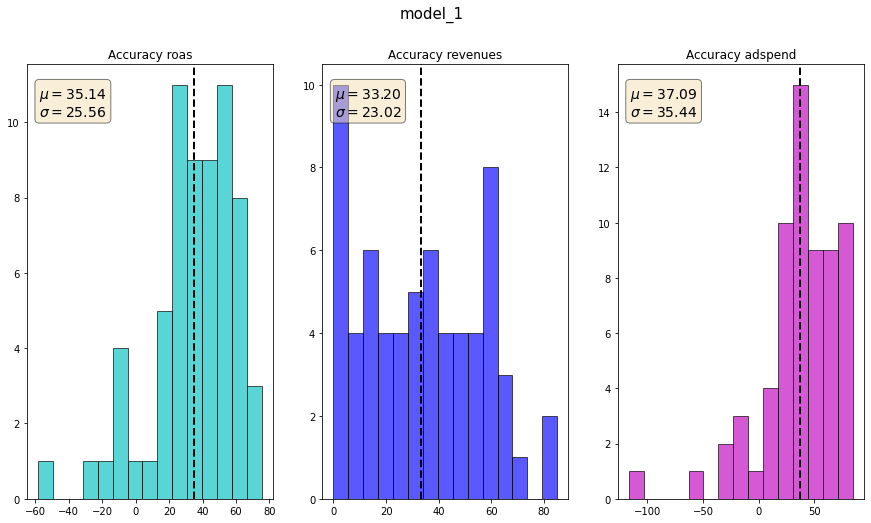

In [ ]:
fig, axs = plt.subplots(1, 3,figsize=(15, 8))
axs[0].hist(acc.acc_roas, bins=15, color='c', edgecolor='k', alpha=0.65)
axs[0].axvline(acc.acc_roas.mean(), color='k', linestyle='dashed', linewidth=2);
axs[0].title.set_text("Accuracy roas");
mean=acc.acc_roas.mean()
std=acc.acc_roas.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mean, ),
    r'$\sigma=%.2f$' % (std, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
axs[0].text(0.05, 0.95, textstr, transform=axs[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

axs[1].hist(acc.acc_revenues, bins=15, color='b', edgecolor='k', alpha=0.65)
axs[1].axvline(acc.acc_revenues.mean(), color='k', linestyle='dashed', linewidth=2);
axs[1].title.set_text("Accuracy revenues");
mean=acc.acc_revenues.mean()
std=acc.acc_revenues.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mean, ),
    r'$\sigma=%.2f$' % (std, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
axs[1].text(0.05, 0.95, textstr, transform=axs[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)



axs[2].hist(acc.acc_ad_spend, bins=15, color='m', edgecolor='k', alpha=0.65)
axs[2].axvline(acc.acc_ad_spend.mean(), color='k', linestyle='dashed', linewidth=2);
axs[2].title.set_text("Accuracy adspend");
mean=acc.acc_ad_spend.mean()
std=acc.acc_ad_spend.std()
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mean, ),
    r'$\sigma=%.2f$' % (std, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
axs[2].text(0.05, 0.95, textstr, transform=axs[2].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.suptitle("model_1", fontsize = 15);